In [1]:
# чтобы изменения в других файлах автоматически подгружались в импорты
%load_ext IPython.extensions.autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('..') # i dont know - stack overflow (иначе нельзя импортировать из папки выше)

import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

from model import FinData
from model import train_valid_split, train_valid_test_split
from model import CatboostFinModel

from datetime import datetime

c:\Users\Даша\Desktop\Invest-Predict main\prices-predictions\prices-predictions-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
data = FinData("../datasets/T_yandex_10min.csv")

windows_ma = [2, 4, 6, 18, 30, 50, 500, 1000] # здесь можно менять окна для признаков и пробовать другие
shifts_norms = [2, 3, 4, 5, 6]

data.insert_time_features()
data.make_binary_class_target(target_name="direction_binary")
data.insert_rolling_means(windows_ma)
data.insert_shifts_norms(shifts_norms)
data.insert_exp_rolling_means(windows_ma)
data.insert_random_prediction()

numeric = data.get_numeric_features()
cat = data.get_cat_features()

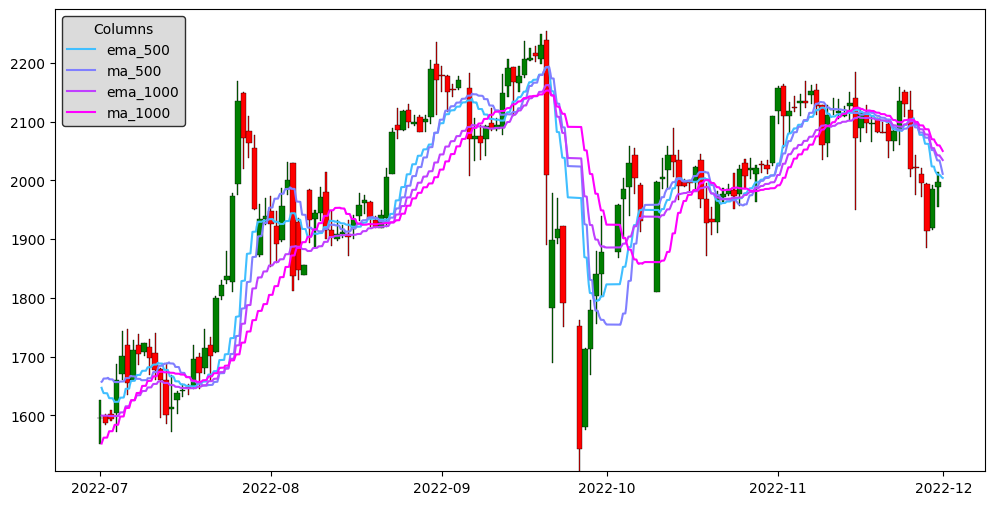

In [8]:
data.visualize_time_frame(datetime(2022, 7, 1), datetime(2022, 12, 1), columns=['candle', 'ema_500', 'ma_500', 'ema_1000', 'ma_1000'], candle_freq='1d', cmap='cool', line_kwargs={'linewidth': 1.5})

Пример с отрисовкой предсказаний

In [9]:
args = {"iterations" : 20, 
        "depth" : 5, 
        "learning_rate" : 0.01,
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

In [69]:
X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

In [70]:
model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()

0:	learn: 0.5568152	test: 0.5909091	best: 0.5909091 (0)	total: 29.9ms	remaining: 568ms
1:	learn: 0.5586625	test: 0.6010101	best: 0.6010101 (1)	total: 58ms	remaining: 522ms
2:	learn: 0.5600703	test: 0.6212121	best: 0.6212121 (2)	total: 86.5ms	remaining: 490ms
3:	learn: 0.5606141	test: 0.6060606	best: 0.6212121 (2)	total: 115ms	remaining: 460ms
4:	learn: 0.5604055	test: 0.6212121	best: 0.6212121 (2)	total: 144ms	remaining: 431ms
5:	learn: 0.5601076	test: 0.6111111	best: 0.6212121 (2)	total: 170ms	remaining: 397ms
6:	learn: 0.5598841	test: 0.6111111	best: 0.6212121 (2)	total: 199ms	remaining: 370ms
7:	learn: 0.5595936	test: 0.6111111	best: 0.6212121 (2)	total: 228ms	remaining: 342ms
8:	learn: 0.5598841	test: 0.6161616	best: 0.6212121 (2)	total: 258ms	remaining: 315ms
9:	learn: 0.5600629	test: 0.6161616	best: 0.6212121 (2)	total: 287ms	remaining: 287ms
10:	learn: 0.5601374	test: 0.6111111	best: 0.6212121 (2)	total: 318ms	remaining: 260ms
11:	learn: 0.5601671	test: 0.6111111	best: 0.6212121

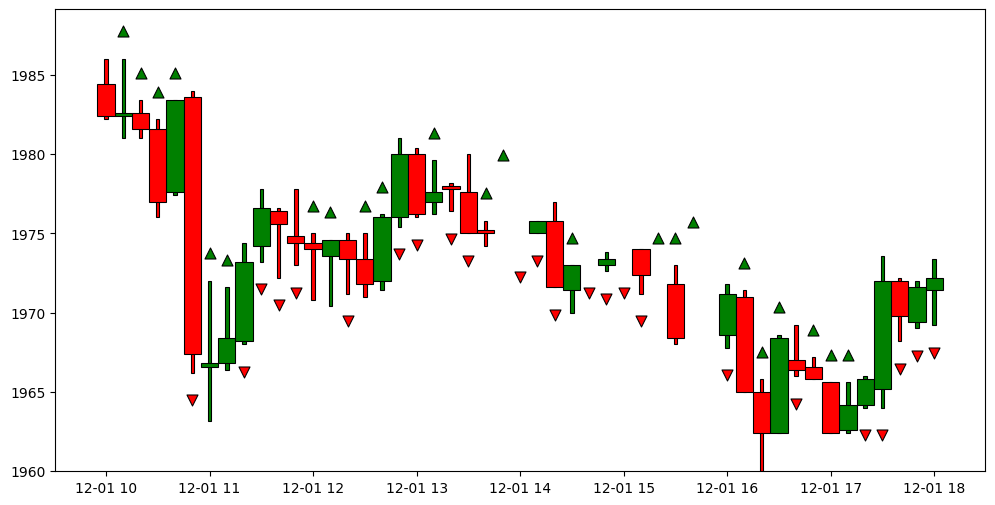

In [71]:
data.visualize_time_frame(datetime(2022, 12, 1, 10), datetime(2022, 12, 1, 18), predictor=model)

Пример с заменой свечей на часовые и отрисовкой предсказаний

In [ ]:
data = FinData("../datasets/T_yandex_10min.csv")

data.merge_candles('1h')

windows_ma = [2, 4, 6, 18, 30, 50, 500, 1000] # здесь можно менять окна для признаков и пробовать другие
shifts_norms = [2, 3, 4, 5, 6]

data.insert_time_features()
data.make_binary_class_target()
data.insert_rolling_means(windows_ma)
data.insert_shifts_norms(shifts_norms)
data.insert_exp_rolling_means(windows_ma)

TypeError: FinData.make_binary_class_target() missing 1 required positional argument: 'target_name'

In [73]:
X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")
model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()

0:	learn: 0.5376433	test: 0.5294118	best: 0.5294118 (0)	total: 9.99ms	remaining: 190ms
1:	learn: 0.5404769	test: 0.5294118	best: 0.5294118 (0)	total: 19.2ms	remaining: 173ms
2:	learn: 0.5416104	test: 0.5294118	best: 0.5294118 (0)	total: 29.3ms	remaining: 166ms
3:	learn: 0.5439644	test: 0.5294118	best: 0.5294118 (0)	total: 38.1ms	remaining: 153ms
4:	learn: 0.5422643	test: 0.5294118	best: 0.5294118 (0)	total: 48ms	remaining: 144ms
5:	learn: 0.5432233	test: 0.5294118	best: 0.5294118 (0)	total: 58.8ms	remaining: 137ms
6:	learn: 0.5424822	test: 0.5294118	best: 0.5294118 (0)	total: 68.4ms	remaining: 127ms
7:	learn: 0.5423950	test: 0.5294118	best: 0.5294118 (0)	total: 79.2ms	remaining: 119ms
8:	learn: 0.5422207	test: 0.5588235	best: 0.5588235 (8)	total: 88.4ms	remaining: 108ms
9:	learn: 0.5422643	test: 0.5588235	best: 0.5588235 (8)	total: 97.9ms	remaining: 97.9ms
10:	learn: 0.5421771	test: 0.5588235	best: 0.5588235 (8)	total: 108ms	remaining: 88ms
11:	learn: 0.5425258	test: 0.5588235	best: 0.

In [74]:
data.df.count()

utc                      22973
open                     22973
close                    22973
high                     22973
low                      22973
                         ...  
close_normed_ema_50      22973
ema_500                  22973
close_normed_ema_500     22973
ema_1000                 22973
close_normed_ema_1000    22973
Length: 61, dtype: int64

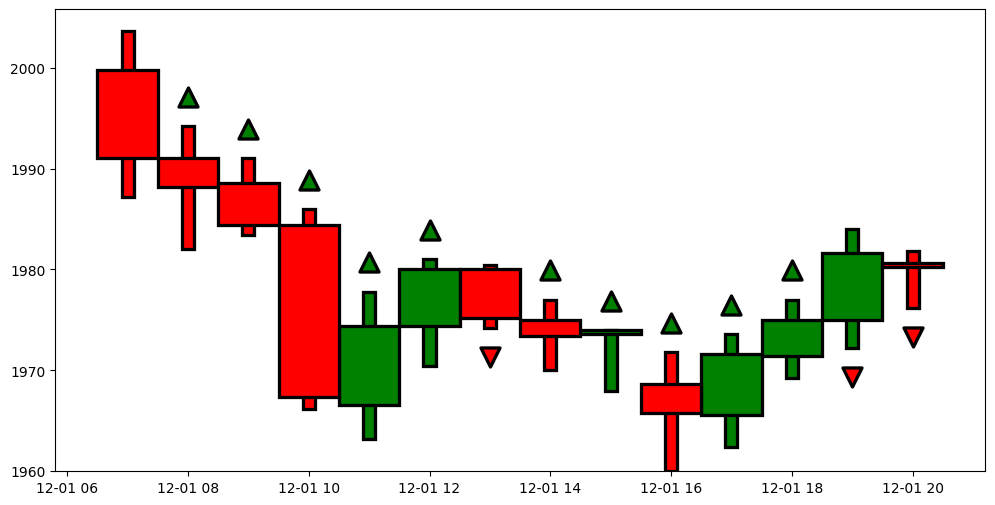

In [76]:
data.visualize_time_frame(datetime(2022, 12, 1), datetime(2022, 12, 2), predictor=model)

Сейчас в нашей валидационной выборке берется два дня, в трейне месяц. Возможно, нужно взять периоды побольше, чтобы повысить репрезентативность валидационной выборки. Обучим модель на месяце свечей и посмотрим на accuracy на периодах примерно по два дня.

In [29]:
data.restrict_time_down(datetime(2024, 9, 1))

X_train, _, y_train, _ = train_valid_split(data=data.df, 
                                                   year=2024, month=10, day=1, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

data.restrict_time_down(datetime(2024, 10, 1))

X_val, X_test, y_val, y_test = train_valid_split(data=data.df, 
                                                   year=2024, month=10, day=3, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

args = {"iterations" : 1000, 
        "depth" : 5, 
        "learning_rate" : 0.01,
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()

0:	learn: 0.5879987	test: 0.5303030	best: 0.5303030 (0)	total: 20.5ms	remaining: 20.4s
1:	learn: 0.5960443	test: 0.5707071	best: 0.5707071 (1)	total: 42.3ms	remaining: 21.1s
2:	learn: 0.5896748	test: 0.5808081	best: 0.5808081 (2)	total: 65.5ms	remaining: 21.8s
3:	learn: 0.5923567	test: 0.5959596	best: 0.5959596 (3)	total: 89.7ms	remaining: 22.3s
4:	learn: 0.5936976	test: 0.5808081	best: 0.5959596 (3)	total: 117ms	remaining: 23.2s
5:	learn: 0.5997318	test: 0.5959596	best: 0.5959596 (3)	total: 139ms	remaining: 23s
6:	learn: 0.5993966	test: 0.5808081	best: 0.5959596 (3)	total: 166ms	remaining: 23.5s
7:	learn: 0.5970499	test: 0.5808081	best: 0.5959596 (3)	total: 189ms	remaining: 23.4s
8:	learn: 0.5957090	test: 0.5808081	best: 0.5959596 (3)	total: 216ms	remaining: 23.7s
9:	learn: 0.5990613	test: 0.5808081	best: 0.5959596 (3)	total: 245ms	remaining: 24.2s
10:	learn: 0.5960443	test: 0.5808081	best: 0.5959596 (3)	total: 272ms	remaining: 24.5s
11:	learn: 0.5960443	test: 0.5909091	best: 0.595959

In [30]:
X_train

,volume,close_normed_ma_2,low_normed_ma_2,high_normed_ma_2,close_normed_ma_4,low_normed_ma_4,high_normed_ma_4,close_normed_ma_6,low_normed_ma_6,high_normed_ma_6,...,close_normed_ema_6,close_normed_ema_18,close_normed_ema_30,close_normed_ema_50,close_normed_ema_500,close_normed_ema_1000,target_predict,hours,day,minute
0,19,1.002414,0.999866,1.003084,1.002447,0.999899,1.003118,1.002391,0.999844,1.003062,...,1.001680,1.001970,1.001979,1.001508,0.978957,0.976319,2.942493e+06,4,245,240
1,113,1.001272,0.998460,1.001272,1.001775,0.998962,1.001775,1.002078,0.999263,1.002078,...,1.001199,1.001762,1.001851,1.001449,0.979040,0.976365,2.939731e+06,4,245,250
2,113,0.997860,0.997057,1.000000,0.999063,0.998259,1.001205,0.999486,0.998683,1.001630,...,0.999326,0.999658,0.999726,0.999332,0.977034,0.974325,2.941317e+06,4,245,260
3,104,0.998125,0.998125,0.999464,0.998226,0.998226,0.999565,0.998593,0.998593,0.999933,...,0.998944,0.998975,0.998991,0.998586,0.976341,0.973593,2.940136e+06,4,245,270
4,3,0.999598,0.999598,1.000536,0.998326,0.998326,0.999263,0.998705,0.998705,0.999643,...,0.999245,0.999083,0.999056,0.998642,0.976433,0.973644,2.942504e+06,4,245,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,3228,0.998749,0.998498,0.999249,0.997033,0.996784,0.997533,0.996090,0.995840,0.996589,...,0.997518,0.994452,0.993042,0.991615,0.987224,0.986058,3.177071e+06,20,274,1200
2979,2939,1.001628,0.999749,1.002630,1.000281,0.998405,1.001282,0.999042,0.997168,1.000042,...,0.999566,0.996707,0.995235,0.993733,0.989122,0.987935,3.177458e+06,20,274,1210
2980,1475,1.001064,1.000063,1.001314,1.000907,0.999906,1.001158,0.999708,0.998708,0.999958,...,0.999779,0.997164,0.995657,0.994097,0.989289,0.988082,3.177457e+06,20,274,1220
2981,2696,0.999187,0.998062,1.000313,1.000031,0.998905,1.001158,0.999416,0.998291,1.000542,...,0.999217,0.996680,0.995121,0.993490,0.988468,0.987242,3.173909e+06,20,274,1230


In [31]:
X_val

,volume,close_normed_ma_2,low_normed_ma_2,high_normed_ma_2,close_normed_ma_4,low_normed_ma_4,high_normed_ma_4,close_normed_ma_6,low_normed_ma_6,high_normed_ma_6,...,close_normed_ema_6,close_normed_ema_18,close_normed_ema_30,close_normed_ema_50,close_normed_ema_500,close_normed_ema_1000,target_predict,hours,day,minute
0,50,1.001499,0.998750,1.003749,1.001844,0.999094,1.004094,1.002522,0.999771,1.004774,...,1.001130,0.999739,0.998345,0.996744,0.991505,0.990246,3.169950e+06,4,275,240
1,107,1.000499,0.999127,1.001871,1.001780,1.000406,1.003154,1.002417,1.001042,1.003792,...,1.001164,1.000213,0.998918,0.997350,0.992031,0.990759,3.172316e+06,4,275,250
2,174,1.001746,0.999002,1.001996,1.002622,0.999875,1.002871,1.003144,1.000396,1.003393,...,1.001900,1.001529,1.000386,0.998888,0.993542,0.992257,3.172310e+06,4,275,260
3,86,1.000374,1.000249,1.002118,1.000998,1.000873,1.002743,1.002060,1.001935,1.003807,...,1.001089,1.001033,1.000012,0.998573,0.993197,0.991902,3.170733e+06,4,275,270
4,193,1.001059,0.999813,1.001183,1.001838,1.000592,1.001963,1.002682,1.001435,1.002807,...,1.001668,1.002040,1.001176,0.999824,0.994457,0.993151,3.167571e+06,4,275,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1615,0.999424,0.999296,0.999936,0.998721,0.998594,0.999233,0.998105,0.997977,0.998616,...,0.998846,0.997094,0.995083,0.992191,0.976288,0.971225,3.088750e+06,20,276,1200
194,1513,1.001408,0.999744,1.001408,1.000960,0.999296,1.000960,1.000341,0.998679,1.000341,...,1.000363,0.998885,0.996949,0.994083,0.977999,0.972895,3.090716e+06,20,276,1210
195,5719,1.001983,1.000704,1.002622,1.002111,1.000832,1.002751,1.001684,1.000405,1.002323,...,1.001081,1.000030,0.998219,0.995413,0.979206,0.974064,3.089923e+06,20,276,1220
196,3856,0.999425,0.998914,1.001214,1.000416,0.999904,1.002206,1.000448,0.999936,1.002238,...,0.999951,0.998999,0.997260,0.994492,0.978166,0.972998,3.089927e+06,20,276,1230


In [32]:
X_test

,volume,close_normed_ma_2,low_normed_ma_2,high_normed_ma_2,close_normed_ma_4,low_normed_ma_4,high_normed_ma_4,close_normed_ma_6,low_normed_ma_6,high_normed_ma_6,...,close_normed_ema_6,close_normed_ema_18,close_normed_ema_30,close_normed_ema_50,close_normed_ema_500,close_normed_ema_1000,target_predict,hours,day,minute
198,51,1.003133,0.995844,1.004412,1.002556,0.995271,1.003834,1.003026,0.995738,1.004305,...,1.002034,1.001592,1.000056,0.997401,0.980832,0.975587,3.089128e+06,4,277,240
199,27,1.001341,1.000319,1.001852,1.001405,1.000383,1.001916,1.001896,1.000873,1.002407,...,1.001088,1.000967,0.999575,0.997013,0.980409,0.975138,3.090708e+06,4,277,250
200,28,0.999490,0.998087,0.999745,1.000926,0.999521,1.001181,1.001022,0.999617,1.001277,...,1.000594,1.000637,0.999364,0.996886,0.980236,0.974939,3.091104e+06,4,277,260
201,238,0.999745,0.998852,1.001276,1.000351,0.999458,1.001883,1.000596,0.999702,1.002128,...,1.000333,1.000456,0.999286,0.996885,0.980189,0.974863,3.090315e+06,4,277,270
202,78,0.999936,0.999298,1.001212,0.999649,0.999011,1.000925,1.000511,0.999872,1.001787,...,1.000238,1.000408,0.999332,0.997007,0.980267,0.974912,3.090315e+06,4,277,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,741,1.001332,1.000000,1.001480,1.000702,0.999372,1.000850,1.000641,0.999310,1.000789,...,1.000543,1.000072,0.999987,1.000420,1.010037,1.006455,2.672891e+06,20,341,1200
6662,563,1.000148,1.000148,1.000444,1.000518,1.000518,1.000813,1.000123,1.000123,1.000419,...,1.000071,0.999668,0.999573,0.999977,1.009550,1.005997,2.671709e+06,20,341,1210
6663,1449,0.998596,0.998448,0.999631,0.999150,0.999002,1.000185,0.998916,0.998768,0.999951,...,0.999206,0.998645,0.998494,0.998842,1.008323,1.004797,2.672897e+06,20,341,1220
6664,8532,0.995859,0.991273,0.999852,0.995638,0.991054,0.999630,0.995810,0.991225,0.999803,...,0.996894,0.995611,0.995272,0.995478,1.004722,1.001226,2.672909e+06,20,341,1230


In [42]:
dates = []
accuracies = []
for day in range(278, 341, 2):
    dates.append(datetime.fromordinal(day).replace(year=2024))
    filter = (X_test["day"] >= day) & (X_test["day"] <= day + 1)
    accuracies.append(model.score(X_test[filter], y_test[filter]))

Text(0.5, 1.0, 'Test Accuracies on periods of two days')

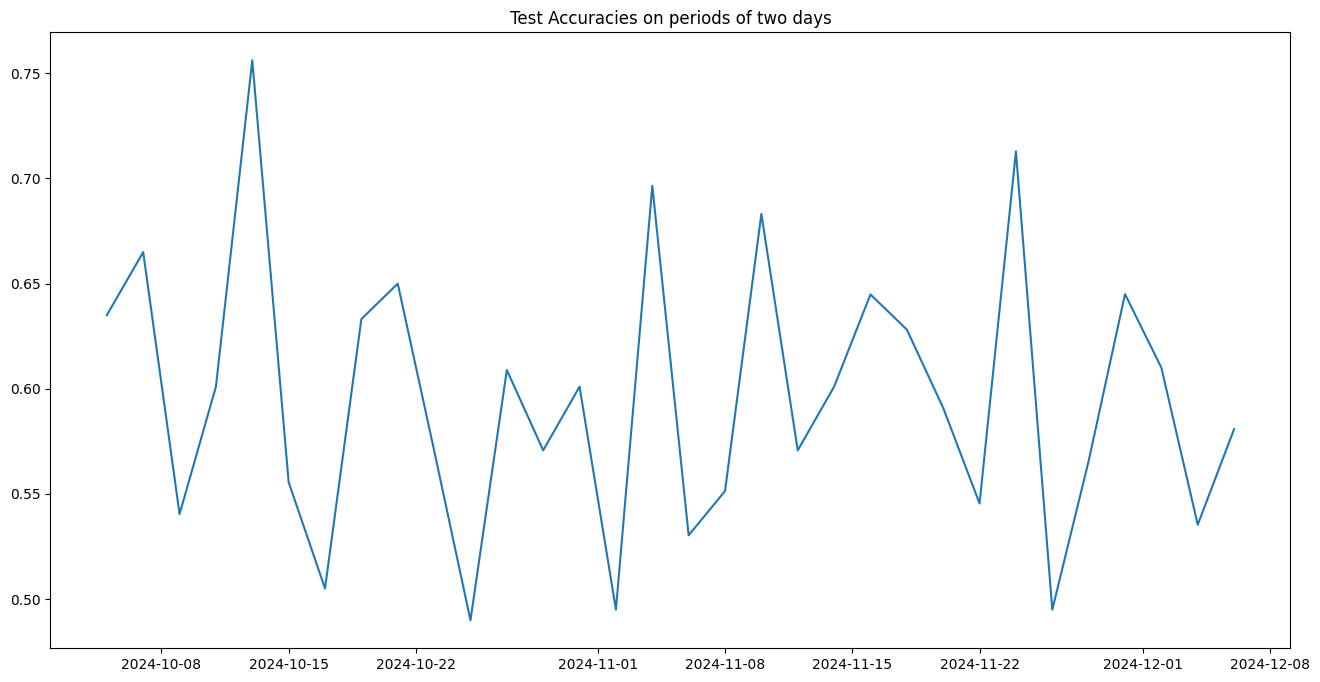

In [44]:
plt.figure(figsize=(16, 8))

plt.plot(dates, accuracies)
plt.title("Test Accuracies on periods of two days")